# Extract Envisat SIT

# Read Envisat 25 x 25 km

In [2]:
import netCDF4 as nc4
import xarray as xr

In [3]:
import matplotlib.pyplot as plt

In [7]:
from glob import glob
import numpy as np

In [ ]:
# Loop over all datasets

In [ ]:
# open file
# put in xarray

# save average month 

# save as netcdf

In [ ]:
# get all .tif files from CAMPAIGNS

In [5]:
en_folder = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/'

In [15]:
list_files = np.sort(glob(f'{en_folder}/*/*.nc', recursive=True))

In [16]:
list_files

array(['/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/2002/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200210-fv2.0.nc',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/2002/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200211-fv2.0.nc',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/2002/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200212-fv2.0.nc',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/2003/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200301-fv2.0.nc',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/2003/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200302-fv2.0.nc',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/2003/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200303-fv2.0.nc',
       '/scratch/project_465000269/edelleo1/Leo/SIT_

In [46]:
sit_en = np.zeros((len(list_files), 432, 432))
dt = []

for n, fl in enumerate(list_files):
    nc = xr.open_mfdataset(f'{fl}', combine='nested', concat_dim='time')
    sit_en[n] = nc['sea_ice_thickness']
    dt += [nc['time'].data[0]]

In [6]:
nc

<xarray.Dataset>
Dimensions:                        (time: 1, yc: 432, xc: 432, nv: 2)
Coordinates:
    lat                            (yc, xc) float64 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon                            (yc, xc) float64 dask.array<chunksize=(432, 432), meta=np.ndarray>
  * time                           (time) datetime64[ns] 2003-01-01
  * xc                             (xc) float64 -5.388e+03 ... 5.388e+03
  * yc                             (yc) float64 5.388e+03 ... -5.388e+03
Dimensions without coordinates: nv
Data variables:
    freeboard                      (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    freeboard_uncertainty          (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    radar_freeboard                (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    radar_freeboard_uncertainty    (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    sea_ice_concentration          (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    sea_ice_thickness              (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    sea_ice_thickness_uncertainty  (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    status_flag                    (time, yc, xc) int8 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    time_bnds                      (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Lambert_Azimuthal_Grid         (time) int8 -127
Attributes: (12/37)
    title:                     ESA Climate Change Initiative Sea Ice: Norther...
    institution:               Alfred-Wegener-Institut Helmholtz Zentrum für ...
    source:                    Altimetry: envisat, Snow depth: Warren Climato...
    platform:                  Envisat
    sensor:                    RA-2
    history:                   20180417T093947Z (created)
    ...                        ...
    time_coverage_end:         20030131T235959Z
    time_coverage_duration:    P1M
    time_coverage_resolution:  P1M
    spatial_resolution:        25 km
    standard_name_vocabulary:  CF
    license:                   Creative Commons Attribution 4.0 International...

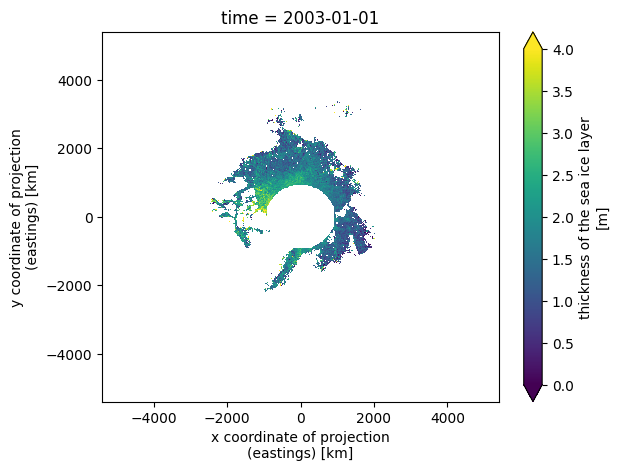

In [41]:
sit_en.isel(time=0).plot(vmin=0, vmax=4)

## Get lat lon

In [28]:
nc['sea_ice_thickness']

<xarray.DataArray 'sea_ice_thickness' (time: 1, yc: 432, xc: 432)>
dask.array<open_dataset-51c89274d4dcba6d21a49b34e4b117efsea_ice_thickness, shape=(1, 432, 432), dtype=float32, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Coordinates:
    lat      (yc, xc) float64 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float64 dask.array<chunksize=(432, 432), meta=np.ndarray>
  * time     (time) datetime64[ns] 2012-03-01
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
Attributes:
    ancillary_variables:  sea_ice_thickness_uncertainty status_flag
    grid_mapping:         Lambert_Azimuthal_Grid
    long_name:            thickness of the sea ice layer
    standard_name:        sea_ice_thickness
    units:                m

# Clean the data

In [49]:
sit = xr.DataArray(
    data=sit_en,
    dims=["time", "y", "x"],
    coords=dict(
        time=(["time"], dt),
        x=(["x"], nc['sea_ice_thickness'].xc.data),
        y=(["y"], nc['sea_ice_thickness'].yc.data),
        lon=(["y", "x"], nc['sea_ice_thickness'].lon.data),
        lat=(["y", "x"], nc['sea_ice_thickness'].lat.data)
    ),
    attrs=dict(
        name="Sea ice thickness",
        description="Envisat",
        project='TARDIS',
        units="m",
    ),
)

sit.name = 'sit'

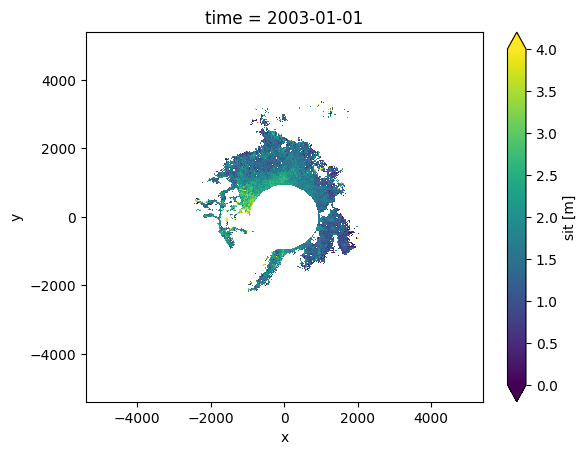

In [53]:
sit.isel(time=3).plot(vmin=0, vmax=4)

In [54]:
sit.time

<xarray.DataArray 'time' (time: 69)>
array(['2002-10-01T00:00:00.000000000', '2002-11-01T00:00:00.000000000',
       '2002-12-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2003-02-01T00:00:00.000000000', '2003-03-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2003-10-01T00:00:00.000000000',
       '2003-11-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2004-02-01T00:00:00.000000000',
       '2004-03-01T00:00:00.000000000', '2004-04-01T00:00:00.000000000',
       '2004-10-01T00:00:00.000000000', '2004-11-01T00:00:00.000000000',
       '2004-12-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2005-02-01T00:00:00.000000000', '2005-03-01T00:00:00.000000000',
       '2005-04-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-10-01T00:00:00.000000000', '2006-11-01T00:00:00.000000000',
       '2006-12-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2007-02-01T00:00:00.000000000', '2007-03-01T00:00:00.000000000',
       '2007-04-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-10-01T00:00:00.000000000', '2008-11-01T00:00:00.000000000',
       '2008-12-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2009-02-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2002-10-01 2002-11-01 ... 2012-03-01

In [55]:
odir = en_folder
ofile = 'SIT_Envisat_200210-201203.nc'


In [56]:
sit.to_netcdf(f'{odir}{ofile}')
print(f'Envisat gridded saved as: {odir}{ofile}')

Envisat gridded saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/CCI/envisat/v2.0/NH/SIT_Envisat_200210-201203.nc
